## Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#read the dataset
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [8]:
#convert the categorical features to object data type from int64
col=['User_ID','Occupation','Marital_Status','Product_Category']

In [9]:
for c in col:
    df[col]=df[col].astype('object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [11]:
# statistical summary of the data
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [12]:
df.describe(include='object')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


Let us look at the total purchase amount spent by each gender

In [22]:
#Total Purchase by Gender
df.groupby('Gender')[['Purchase']].sum().reset_index()

,Gender,Purchase
0,F,1186232642
1,M,3909580100


<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

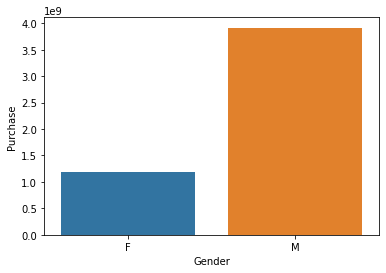

In [14]:
sns.barplot(y='Purchase', x='Gender', data=df, estimator=np.sum)

In [265]:
#Total Purchase by Gender
df.groupby('Gender')[['Purchase']].sum()/df.groupby('Gender')[['Purchase']].sum().sum()

,Purchase
Gender,
F,0.232786
M,0.767214


In [266]:
df.groupby('User_ID')[['Gender']].max().value_counts(normalize=True)

Gender
M         0.717196
F         0.282804
dtype: float64

In [267]:
#Average Product Spend by Gender
df.groupby('Gender')[['Purchase']].mean().reset_index()

,Gender,Purchase
0,F,8734.565765
1,M,9437.526040


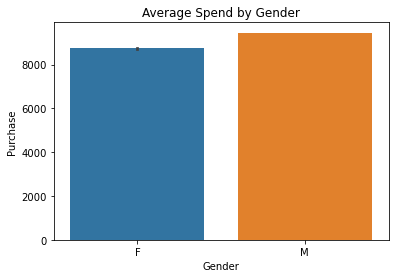

In [268]:
sns.barplot(y='Purchase', x='Gender', data=df, estimator=np.mean)
plt.title('Average Spend by Gender')
plt.show()

Overall spend by Males is 5% higher than thier population proportion in the data. However the average spent by both genders is not significantly different.

Let's look at spending pattern by marital status

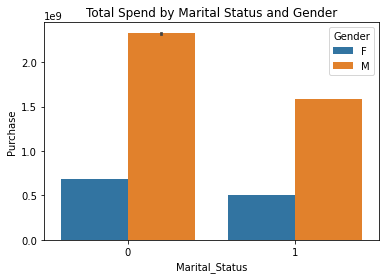

In [269]:
sns.barplot(y='Purchase', x='Marital_Status', data=df, hue='Gender' ,estimator=np.sum)
plt.title('Total Spend by Marital Status and Gender')
plt.show()

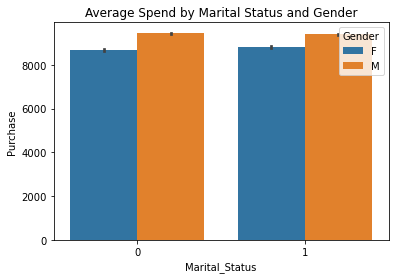

In [270]:
sns.barplot(y='Purchase', x='Marital_Status', data=df, hue='Gender' ,estimator=np.mean)
plt.title('Average Spend by Marital Status and Gender')
plt.show()

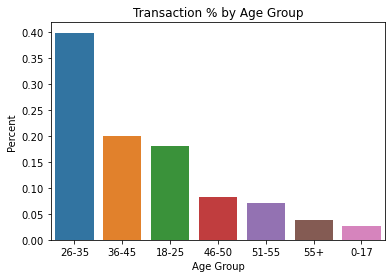

In [271]:
#Age Group distribution of Transactions
sns.barplot(y='Age', x='index', data=df['Age'].value_counts(normalize=True).reset_index())
plt.ylabel('Percent');
plt.xlabel('Age Group');
plt.title('Transaction % by Age Group')
plt.show()

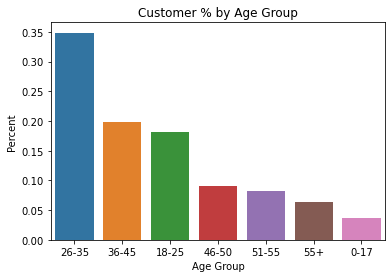

In [272]:
#Age group for unique customers
sns.barplot(y='Age', x='index', data=df_summary['Age'].value_counts(normalize=True).reset_index())
plt.ylabel('Percent');
plt.xlabel('Age Group');
plt.title('Customer % by Age Group')
plt.show()

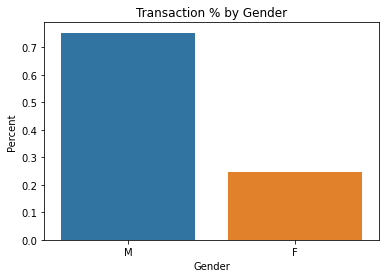

In [273]:
#Gender distribution of Transactions
sns.barplot(y='Gender', x='index', data=df['Gender'].value_counts(normalize=True).reset_index())
plt.ylabel('Percent');
plt.xlabel('Gender');
plt.title('Transaction % by Gender')
plt.show()

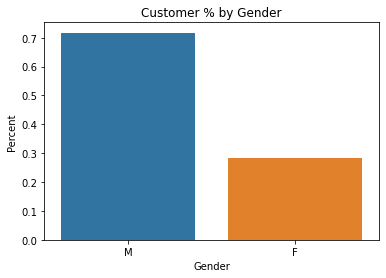

In [274]:
#Gender for unique customers
sns.barplot(y='Gender', x='index', data=df_summary['Gender'].value_counts(normalize=True).reset_index())
plt.ylabel('Percent');
plt.xlabel('Gender');
plt.title('Customer % by Gender')
plt.show()

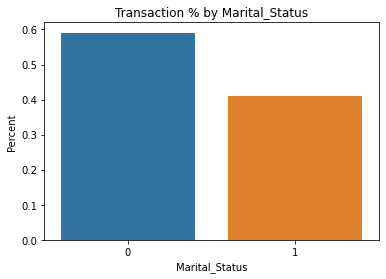

In [275]:
#Marital Statusdistribution of Transactions
sns.barplot(y='Marital_Status', x='index', data=df['Marital_Status'].value_counts(normalize=True).reset_index())
plt.ylabel('Percent');
plt.xlabel('Marital_Status');
plt.title('Transaction % by Marital_Status')
plt.show()

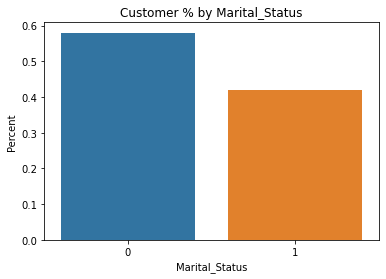

In [276]:
#Marital Status for unique customers
sns.barplot(y='Marital_Status', x='index', data=df_summary['Marital_Status'].value_counts(normalize=True).reset_index())
plt.ylabel('Percent');
plt.xlabel('Marital_Status');
plt.title('Customer % by Marital_Status')
plt.show()

In [277]:
#create a summary dataframe for aggregated purchase by each customer

In [17]:
df_user=df.groupby('User_ID')[['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']].max()
df_user

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
User_ID,,,,,,
1000001,F,0-17,10,A,2,0
1000002,M,55+,16,C,4+,0
1000003,M,26-35,15,A,3,0
1000004,M,46-50,7,B,2,1
1000005,M,26-35,20,A,1,1
...,...,...,...,...,...,...
1006036,F,26-35,15,B,4+,1
1006037,F,46-50,1,C,4+,0
1006038,F,55+,1,C,2,0


In [279]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5891 entries, 1000001 to 1006040
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Gender                      5891 non-null   object
 1   Age                         5891 non-null   object
 2   Occupation                  5891 non-null   int64 
 3   City_Category               5891 non-null   object
 4   Stay_In_Current_City_Years  5891 non-null   object
 5   Marital_Status              5891 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 322.2+ KB


In [280]:
df_user1=df.groupby('User_ID')[['Purchase']].sum()

In [281]:
df_user1

,Purchase
User_ID,
1000001,334093
1000002,810472
1000003,341635
1000004,206468
1000005,821001
...,...
1006036,4116058
1006037,1119538
1006038,90034


In [282]:
df_summary=pd.merge(df_user, df_user1, on="User_ID").reset_index()

In [283]:
df_summary

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,F,0-17,10,A,2,0,334093
1,1000002,M,55+,16,C,4+,0,810472
2,1000003,M,26-35,15,A,3,0,341635
3,1000004,M,46-50,7,B,2,1,206468
4,1000005,M,26-35,20,A,1,1,821001
...,...,...,...,...,...,...,...,...
5886,1006036,F,26-35,15,B,4+,1,4116058
5887,1006037,F,46-50,1,C,4+,0,1119538
5888,1006038,F,55+,1,C,2,0,90034
5889,1006039,F,46-50,0,B,4+,1,590319


In [284]:
#Calculatre Gender Ratio
df_summary['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

In [285]:
df_summary['Gender'].value_counts(normalize=True)

M    0.717196
F    0.282804
Name: Gender, dtype: float64

In [286]:
df_summary[df_summary['Gender']=='M']['Marital_Status'].value_counts(normalize=True)

0    0.584615
1    0.415385
Name: Marital_Status, dtype: float64

In [287]:
df_summary.describe()

,User_ID,Occupation,Marital_Status,Purchase
count,5.891000e+03,5891.000000,5891.000000,5.891000e+03
mean,1.003025e+06,8.153285,0.419963,8.650166e+05
std,1.743379e+03,6.323140,0.493594,9.436445e+05
min,1.000001e+06,0.000000,0.000000,4.668100e+04
25%,1.001518e+06,3.000000,0.000000,2.376780e+05
50%,1.003026e+06,7.000000,0.000000,5.212130e+05
75%,1.004532e+06,14.000000,1.000000,1.119250e+06
max,1.006040e+06,20.000000,1.000000,1.053691e+07


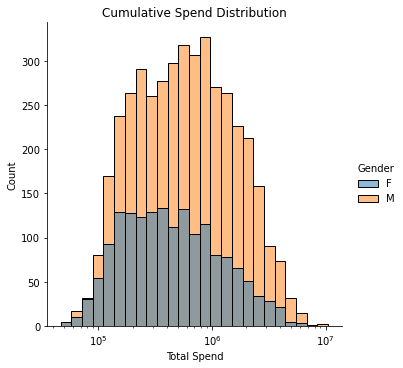

In [288]:
#histogram of total purchase value by each gender
sns.displot(x='Purchase', data=df_summary, hue='Gender', bins=25, log_scale=True )
plt.xlabel('Total Spend');
plt.title('Cumulative Spend Distribution')
plt.show()

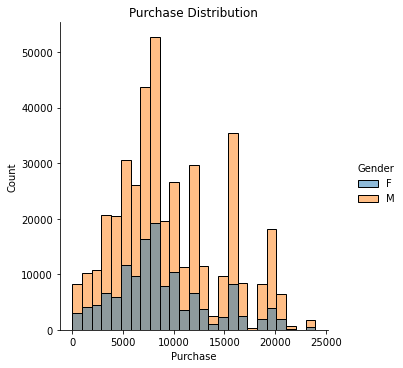

In [289]:
#histogram for item purchase value by gender
sns.displot(x='Purchase', data=df, bins=25, hue='Gender')
plt.title('Purchase Distribution')
plt.show()

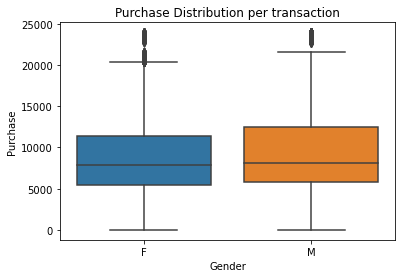

In [290]:
sns.boxplot(y='Purchase', data=df, x='Gender')
plt.title('Purchase Distribution per transaction')
plt.show()

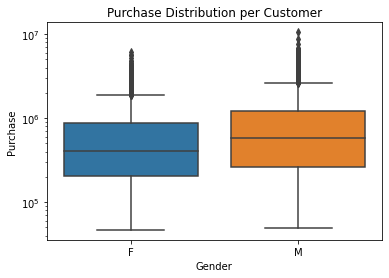

In [291]:
ax=sns.boxplot(y='Purchase', data=df_summary, x='Gender')
ax.set_yscale('log')
plt.title('Purchase Distribution per Customer')
plt.show()

In [41]:
df_summary[df_summary['Gender']=='M']['Purchase'].mean()

925344.4023668639

In [42]:
df_summary[df_summary['Gender']=='F']['Purchase'].mean()

712024.3949579832

In [43]:
df['Product_ID'].nunique()

3631

In [45]:
#Treat outliers in the summary dataframe

In [46]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [47]:
lr,ur=remove_outlier(df_summary['Purchase'])
df_summary['Purchase']=np.where(df_summary['Purchase']>ur,ur,df_summary['Purchase'])
df_summary['Purchase']=np.where(df_summary['Purchase']<lr,lr,df_summary['Purchase'])

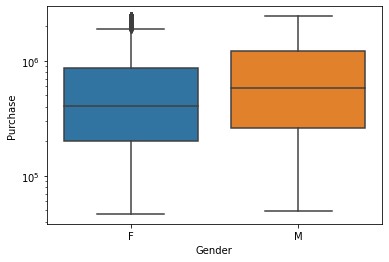

In [48]:
ax=sns.boxplot(y='Purchase', data=df_summary, x='Gender')
ax.set_yscale('log')

In [49]:
df_summary[df_summary['Gender']=='M']['Purchase'].mean()

840421.4665680473

In [50]:
df_summary[df_summary['Gender']=='F']['Purchase'].mean()

665433.0969387755

In [51]:
df[df['Gender']=='M']['Product_ID'].nunique()

3588

In [52]:
df[df['Gender']=='F']['Product_ID'].nunique()

3367

In [53]:
import random
import statistics

In [54]:
random.seed(10)

In [55]:
def myboot(mysample):
    resample=random.choices(mysample, k=100)
    m = np.mean(resample)
    return m

In [56]:
mean_M =[]
mean_F = []


In [57]:
for i in range(1000):
    m=myboot(df_summary[df_summary['Gender']=='M']['Purchase'].to_list())
    f=myboot(df_summary[df_summary['Gender']=='F']['Purchase'].to_list())
    mean_M.append(m)
    mean_F.append(f)

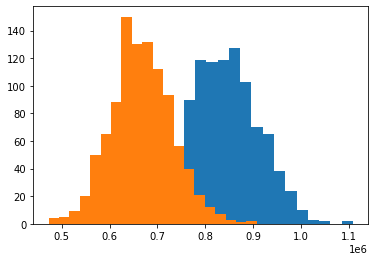

In [67]:
plt.hist(x=mean_M, bins=20)
plt.hist(x=mean_F, bins=20)
plt.show()

In [64]:
df_mean = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'value': mean_M, 'name': 'mean_M'}),
    pd.DataFrame.from_dict({'value': mean_F, 'name': 'mean_F'})
])

In [65]:
df_mean

,value,name
0,781143.0225,mean_M
1,848578.5675,mean_M
2,837703.7775,mean_M
3,847778.4200,mean_M
4,890152.9725,mean_M
...,...,...
1995,701015.0825,mean_F
1996,888472.1475,mean_F
1997,685350.7125,mean_F
1998,606526.2850,mean_F


<AxesSubplot:xlabel='value', ylabel='Count'>

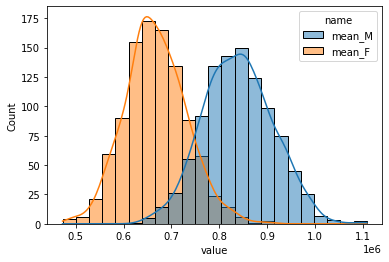

In [66]:
sns.histplot(x='value', hue='name', data= df_mean, kde=True)


In [198]:
#calculating the 95% confidence interval

In [160]:
confidence=.95

In [167]:
np.percentile(mean_M,[100*(1-confidence)/2,100*(1-(1-confidence)/2)]) 
# array([-0.13559955, 0.26480175])

array([703690.3676875, 981944.1235625])

In [293]:
np.mean(mean_M)

839361.2356475

In [294]:
np.mean(mean_F)

667241.7669225001

In [168]:
np.percentile(mean_F,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])

array([546147.017875, 797060.916125])

In [295]:
#analysing on individual product purchase

In [296]:
mean_MP =[]
mean_FP = []


In [297]:
for i in range(1000):
    mp=myboot(df[df['Gender']=='M']['Purchase'].to_list())
    fp=myboot(df[df['Gender']=='F']['Purchase'].to_list())
    mean_MP.append(mp)
    mean_FP.append(fp)

In [298]:
df_meanP = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'value': mean_MP, 'name': 'mean_MP'}),
    pd.DataFrame.from_dict({'value': mean_FP, 'name': 'mean_FP'})
])

In [299]:
df_meanP

,value,name
0,9033.98,mean_MP
1,9128.15,mean_MP
2,9610.87,mean_MP
3,9219.72,mean_MP
4,9507.67,mean_MP
...,...,...
1995,9555.25,mean_FP
1996,9135.31,mean_FP
1997,8905.42,mean_FP
1998,9025.40,mean_FP


<AxesSubplot:xlabel='value', ylabel='Count'>

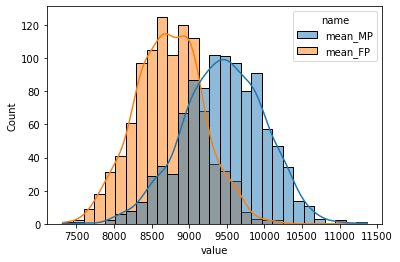

In [300]:
sns.histplot(x='value', hue='name', data= df_meanP, kde=True)


In [301]:
np.percentile(mean_MP,[100*(1-confidence)/2,100*(1-(1-confidence)/2)]) 
# array([-0.13559955, 0.26480175])

array([ 8388.6085 , 10438.00025])

In [302]:
np.mean(mean_MP)

9454.1718

In [303]:
np.mean(mean_FP)

8728.72641

In [304]:
np.percentile(mean_FP,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])

array([7861.45525, 9639.698  ])

### Analysing the Purchase with respect to Age Group and Marital Status

In [74]:
Age=df['Age'].unique()
MS=df['Marital_Status'].unique()

In [91]:
feature=[Age,MS]
feature_label=['Age','Marital_Status']

In [142]:
out_df=pd.DataFrame(columns=['feat','cat','mean'])

In [143]:
out_df

,feat,cat,mean


In [144]:
for f,fl in zip(feature,feature_label):
    #print(f,fl)
    for cat in f:
        #print(fl,cat)
        for i in range(300):
            #print(df[fl])
            a=myboot(df[df[fl]==cat]['Purchase'].to_list())
            #print(fl,cat,a)
            out_df=out_df.append({'feat':fl,'cat':cat,'mean':a},ignore_index=True)


In [145]:
out_df

,feat,cat,mean
0,Age,0-17,9442.98
1,Age,0-17,9252.04
2,Age,0-17,8917.43
3,Age,0-17,9700.23
4,Age,0-17,8474.66
...,...,...,...
2695,Marital_Status,1,8955.91
2696,Marital_Status,1,9230.03
2697,Marital_Status,1,9911.22
2698,Marital_Status,1,9109.26


In [147]:
df_age_mean=out_df[out_df['feat']=='Age'][['cat','mean']]

In [148]:
df_age_mean

,cat,mean
0,0-17,9442.98
1,0-17,9252.04
2,0-17,8917.43
3,0-17,9700.23
4,0-17,8474.66
...,...,...
2095,18-25,9156.28
2096,18-25,9117.11
2097,18-25,9994.99
2098,18-25,8682.82


<AxesSubplot:xlabel='mean', ylabel='Density'>

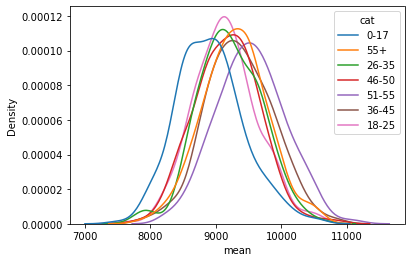

In [151]:
sns.kdeplot(x='mean', hue='cat', data= df_age_mean)

In [152]:
df_ms_mean=out_df[out_df['feat']=='Marital_Status'][['cat','mean']]

<AxesSubplot:xlabel='mean', ylabel='Count'>

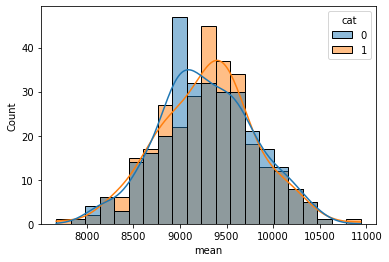

In [153]:
sns.histplot(x='mean', hue='cat', data= df_ms_mean, kde=True)

In [192]:
df_age_mm=df_age_mean.groupby('cat').mean().reset_index()

In [193]:
df_age_mm

,cat,mean
0,0-17,8911.186967
1,18-25,9145.856033
2,26-35,9212.302900
3,36-45,9357.227667
4,46-50,9171.530667
5,51-55,9528.466600
6,55+,9290.523333


In [196]:
ci=[.90,.95,.99]

for c in ci:
    lower=[]
    upper=[]
    for i in df_age_mm['cat']:
        x,y=np.percentile(df_age_mean[df_age_mean['cat']==i]['mean'],[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
        lower.append(x)
        upper.append(y)
    df_age_mm['lower_ci '+ str(c)]=lower
    df_age_mm['upper_ci '+ str(c)]=upper        

In [197]:
df_age_mm

,cat,mean,lower_ci 0.9,upper_ci 0.9,lower_ci 0.95,upper_ci 0.95,lower_ci 0.99,upper_ci 0.99
0,0-17,8911.186967,8012.36150,10006.48900,8012.36150,10006.48900,8012.36150,10006.48900
1,18-25,9145.856033,8270.98950,10099.79025,8270.98950,10099.79025,8270.98950,10099.79025
2,26-35,9212.302900,8296.53600,10150.80275,8296.53600,10150.80275,8296.53600,10150.80275
3,36-45,9357.227667,8327.98575,10343.30975,8327.98575,10343.30975,8327.98575,10343.30975
4,46-50,9171.530667,8302.80725,10059.25225,8302.80725,10059.25225,8302.80725,10059.25225
5,51-55,9528.466600,8543.29925,10504.42225,8543.29925,10504.42225,8543.29925,10504.42225
6,55+,9290.523333,8339.97550,10347.12575,8339.97550,10347.12575,8339.97550,10347.12575


In [189]:
df_ms_mm=df_ms_mean.groupby('cat').mean().reset_index()
df_ms_mm

,cat,mean
0,0,9280.139800
1,1,9285.209967


In [190]:
ci=[.90,.95,.99]

for c in ci:
    lower=[]
    upper=[]
    for i in df_ms_mm['cat']:
        x,y=np.percentile(df_ms_mean[df_ms_mean['cat']==i]['mean'],[100*(1-c)/2,100*(1-(1-c)/2)])
        lower.append(x)
        upper.append(y)
    df_ms_mm['lower_ci '+ str(c)]=lower
    df_ms_mm['upper_ci '+ str(c)]=upper


In [191]:
df_ms_mm

,cat,mean,lower_ci 0.9,upper_ci 0.9,lower_ci 0.95,upper_ci 0.95,lower_ci 0.99,upper_ci 0.99
0,0,9280.139800,8489.2385,10137.234,8222.33750,10301.70225,8105.01770,10432.63900
1,1,9285.209967,8409.4500,10154.363,8255.45625,10267.15425,7988.37695,10521.14705
